## Description


*1. NSF Research Awards Abstracts*

This dataset comprises several paper abstracts, one per file, that were furnished by the NSF
(National Science Foundation). A sample abstract is shown at the end.
Your task is developing an unsupervised model which classifies abstracts into a topic (discover
them!). 
Indeed, your goal is to group abstracts based on their semantic similarity.
You can get a sample of abstracts here. Be creative and state clearly your approach. Although
we don’t expect accurate results but a good pipeline of your work.

It is affordable to create a notebook, like Jupyter (if you use python) or a Rmarkdown
report (in case you use R) and make it available for us, i.e. github.
Hint to success in your quest: Develop and stay clear of the data science process you'll
perform over the dataset and highlight important aspects you might consider affordable
to discuss over.
Aside notes: All fields in every abstract file wouldn’t be needed. Be keen.
Good luck and have fun.

In [1]:
#!pip install -r  ../requirements.txt

## General libraries required

In [2]:
from zipfile import ZipFile 
import pandas as pd 
import numpy as np
import matplotlib as plt
import nltk
import re # regex
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords # library that help removing stop words
from nltk.tokenize import RegexpTokenizer#split the text into tokens 
from nltk.stem import WordNetLemmatizer#Normalize words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mauricio.obando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mauricio.obando\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mauricio.obando\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Problem: Your task is developing an unsupervised model which classifies abstracts into a topic
*   Group abstracts based on their semantic similarity.
*   Be creative and state clearly your approach

# Preprocessing
One of the most important things when working with text and type of NLP related models first the process of preprocessing to get rid of the common words like "the","or", "a" and punctuation symbols.
That is why this the first part of the process.

In this case one of the important aspects to take into account is to remove special tags that by default uses XML to normalize the data

In [3]:
file_read=ZipFile('../data/2020.zip')
df_abstracts=pd.DataFrame()
for i in file_read.namelist():
    open_xml=file_read.open(i)
    df_abstracts=df_abstracts.append(pd.read_xml(open_xml),ignore_index=True)

In [4]:
df_abstracts.sample(5).T

,0,1
AwardTitle,Collaborative Research: Excellence in Research...,Workshop on Replication of a Community-Engaged...
AGENCY,NSF,NSF
AwardEffectiveDate,07/01/2020,01/01/2020
AwardExpirationDate,06/30/2023,12/31/2022
AwardTotalIntnAmount,229338.0,27438.0
AwardAmount,345460,27438
AwardInstrument,NaN,NaN
Organization,NaN,NaN
ProgramOfficer,NaN,NaN
AbstractNarration,Head and heart development are closely intertw...,The National Academy of Engineering identified...


In [5]:
df_abstracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13285 entries, 0 to 13284
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardTitle               13285 non-null  object 
 1   AGENCY                   13285 non-null  object 
 2   AwardEffectiveDate       13285 non-null  object 
 3   AwardExpirationDate      13285 non-null  object 
 4   AwardTotalIntnAmount     13285 non-null  float64
 5   AwardAmount              13285 non-null  int64  
 6   AwardInstrument          0 non-null      float64
 7   Organization             0 non-null      float64
 8   ProgramOfficer           0 non-null      float64
 9   AbstractNarration        13144 non-null  object 
 10  MinAmdLetterDate         13285 non-null  object 
 11  MaxAmdLetterDate         13285 non-null  object 
 12  ARRAAmount               0 non-null      float64
 13  TRAN_TYPE                13285 non-null  object 
 14  CFDA_NUM              

In [6]:
#Understanding about the data that the Awardid is unique in this case since normally on papers the unique identifier is DOI
df_abstracts[df_abstracts['AwardID']==(df_abstracts['AwardID'].value_counts().reset_index(name='reset').reset>1).index]

,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardTotalIntnAmount,AwardAmount,AwardInstrument,Organization,ProgramOfficer,AbstractNarration,...,AwardID,Investigator,Institution,Performance_Institution,ProgramElement,ProgramReference,Appropriation,Fund,FUND_OBLG,POR


In [7]:
df_abstracts.AbstractNarration.sample(5)

13259    Geometric variational problems are used to des...
9962     Collective behavior can be observed in a varie...
10643    Lithium-ion batteries (LIBs) have revolutioniz...
7435     Nontechnical:<br/><br/>Perovskites are an impo...
2027     Problems in science are often reduced to mathe...
Name: AbstractNarration, dtype: object

In [8]:
#Removing links if any
df_abstracts.AbstractNarration=df_abstracts.AbstractNarration.astype(str)
df_abstracts['clean_abstract']=df_abstracts.AbstractNarration.apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
#Removing Punctuation
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'/\()@#_-]", " ", s).split()))
#Removing xml tags
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("<[^<]+?>", " ", s).split()))
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("br/?\s?>", " ", s).split()))

#Remove another special characters
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("[%$]", " ", s).split()))

#Remove Numbers
df_abstracts.clean_abstract.replace('\d+', '', regex=True, inplace=True)


df_abstracts[['AbstractNarration','clean_abstract']].sample(10)

,AbstractNarration,clean_abstract
11606,The broader impact/commercial potential of thi...,The broader impact commercial potential of thi...
11410,This Faculty Early Career Development (CAREER)...,This Faculty Early Career Development CAREER g...
8165,The broader impact/commercial potential of thi...,The broader impact commercial potential of thi...
7070,When the 2019 novel coronavirus arrived in the...,When the novel coronavirus arrived in the Uni...
10743,Wood-feeding termites can be highly destructiv...,Wood feeding termites can be highly destructiv...
5700,This award is a one-year extension of the STAR...,This award is a one year extension of the STAR...
6765,"This project, CoV-2-Traceback, enables approac...",This project CoV Traceback enables approaches...
11166,This project will advance the state-of-the-art...,This project will advance the state of the art...
1265,NONTECHNICAL SUMMARY<br/>Additive manufacturin...,NONTECHNICAL SUMMARY Additive manufacturing al...
7852,The SARS-COV-2 virus genome encodes a very sma...,The SARS COV virus genome encodes a very smal...


In [9]:
df_abstracts.clean_abstract

0        Head and heart development are closely intertw...
1        The National Academy of Engineering identified...
2        This award provides three years of funding to ...
3        This collaborative research project involving ...
4        Research Initiation Awards provide support for...
                               ...                        
13280    Recent studies have highlighted the nation s i...
13281    This project links two mathematical fields dyn...
13282    Recent years have seen a dramatic rise in mobi...
13283    Recent years have seen a dramatic rise in mobi...
13284    The Information Technology IT workforce is chr...
Name: clean_abstract, Length: 13285, dtype: object

In [10]:
df_abstracts=df_abstracts[~df_abstracts.AbstractNarration.isna()]

In [11]:
#This are all the stop words related to english
stop_words = set(stopwords.words('english'))
print(stop_words)

{'o', 'few', 'nor', "needn't", 'a', 'where', 'hadn', 'who', 'am', 'own', 'above', 'such', 'haven', 'those', 'up', "shouldn't", 'yourselves', 'each', 'with', 'how', 'hers', 'when', 'your', "didn't", 'more', 'ma', 'against', 'as', 'weren', 'it', 'was', 'over', 'same', 'into', "wouldn't", 'very', 've', 'only', 'll', 'what', 'he', 'through', "you'll", "mustn't", "hasn't", 'all', 'this', 'no', 'myself', 'that', 'during', 'once', 'doesn', "aren't", 'why', 'too', 'is', "that'll", 'of', 'there', 'didn', 'isn', "wasn't", 'both', "don't", 'have', 'couldn', 'ours', 'these', 'wasn', 'to', "should've", 'yourself', 'she', 'for', 'between', "you've", 'herself', 'any', "mightn't", 'then', 'whom', "doesn't", 's', 'has', "it's", "you'd", 'their', 'are', 'further', 'the', "couldn't", 'do', 'i', 'ourselves', 'wouldn', 'and', 'will', 'about', 'some', 'don', 'shan', 'before', 'themselves', 'won', 'down', 'until', 'in', 'just', 'should', 'other', 'him', 're', 'we', "hadn't", "isn't", 'her', 'after', 'needn',

In [12]:
def remove_stop_words(text_input):
    words_array=text_input.lower().split()
    without_stop_words=[i for i in words_array if i not in stop_words ]
    join_text_back_again=' '.join(without_stop_words)
    return join_text_back_again

In [13]:
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda x: remove_stop_words(x))
df_abstracts[['AbstractNarration','clean_abstract']].sample(10)

,AbstractNarration,clean_abstract
6228,A limited understanding of how glacier-ocean i...,limited understanding glacier ocean interactio...
4648,Syracuse University is constructing a new comp...,syracuse university constructing new compute c...
1032,PART 1: NON-TECHNICAL SUMMARY<br/><br/>Polymer...,part non technical summary polymers ladder lik...
5651,Rapid warming in boreal forests has driven div...,rapid warming boreal forests driven diverse ec...
11546,This project will investigate how freshwater m...,project investigate freshwater melt greenland ...
9037,Award Abstract<br/><br/>Proposal Number: 20367...,award abstract proposal number & principal inv...
4270,This International Research Experiences for St...,international research experiences students ir...
8179,"COVID-19, classified as a viral pandemic on 3/...",covid classified viral pandemic rapidly spread...
11106,PART 1: NON-TECHNICAL SUMMARY<br/><br/>This ...,part non technical summary career proposal aim...
1816,The Canadian Hydrogen Intensity Mapping Experi...,canadian hydrogen intensity mapping experiment...


In [14]:
#convert each to a list of words
tokeniser = RegexpTokenizer(r'\w+')
df_abstracts['array_cleaning'] = df_abstracts.clean_abstract.apply(lambda x: tokeniser.tokenize(x))
df_abstracts[['AbstractNarration','clean_abstract','array_cleaning']].sample(10)

,AbstractNarration,clean_abstract,array_cleaning
12144,"When integrated with batteries, fuel cells can...",integrated batteries fuel cells used significa...,"[integrated, batteries, fuel, cells, used, sig..."
803,"In this era of pervasive multicore machines, G...",era pervasive multicore machines gpus cloud se...,"[era, pervasive, multicore, machines, gpus, cl..."
2941,The unprecedented growth of biopharmaceuticals...,unprecedented growth biopharmaceuticals recent...,"[unprecedented, growth, biopharmaceuticals, re..."
720,This project aims to recover an ice core at Co...,project aims recover ice core combatant col bc...,"[project, aims, recover, ice, core, combatant,..."
5785,Mercury is a widespread pollutant and its impa...,mercury widespread pollutant impacts human eco...,"[mercury, widespread, pollutant, impacts, huma..."
1056,nan,nan,[nan]
1441,The solution of partial differential equations...,solution partial differential equations pdes m...,"[solution, partial, differential, equations, p..."
10832,This Faculty Early Career Development (CAREER)...,faculty early career development career grant ...,"[faculty, early, career, development, career, ..."
3162,Developments in artificial intelligence are op...,developments artificial intelligence opening n...,"[developments, artificial, intelligence, openi..."
12890,Interactions of the two sister molecules of li...,interactions two sister molecules life rna dna...,"[interactions, two, sister, molecules, life, r..."


In [15]:
#Normalizing words is that play=plays and like if they are plural should also be in the same..in this case lemmatiser helps with that
lemmatiser = WordNetLemmatizer()
df_abstracts.array_cleaning = df_abstracts.array_cleaning.apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df_abstracts[['AbstractNarration','clean_abstract','array_cleaning']].sample(10)

,AbstractNarration,clean_abstract,array_cleaning
9310,The long-term goal of brain-computer interface...,long term goal brain computer interface bci re...,"[long, term, goal, brain, computer, interface,..."
6607,Lignocellulose is a promising alternative to f...,lignocellulose promising alternative fossil re...,"[lignocellulose, promise, alternative, fossil,..."
393,"This research project centers on L-functions, ...",research project centers l functions mathemati...,"[research, project, center, l, function, mathe..."
1694,"Over the past few years, robots have started t...",past years robots started deployed unstructure...,"[past, years, robots, start, deploy, unstructu..."
11631,"While job growth in STEM fields, specifically ...",job growth stem fields specifically informatio...,"[job, growth, stem, field, specifically, infor..."
2650,PI Name: Chinedum Osuji<br/>Proposal Number: C...,pi name chinedum osuji proposal number cbet ac...,"[pi, name, chinedum, osuji, proposal, number, ..."
5854,The ongoing Coronavirus (COVID-19) outbreak ha...,ongoing coronavirus covid outbreak february rd...,"[ongoing, coronavirus, covid, outbreak, februa..."
972,Non-Technical Summary<br/>Metals and their all...,non technical summary metals alloys provide lo...,"[non, technical, summary, metal, alloy, provid..."
10031,"The current rate of urbanization, coupled with...",current rate urbanization coupled anticipated ...,"[current, rate, urbanization, couple, anticipa..."
12338,"X-ray crystallography, cryo-electron microscop...",x ray crystallography cryo electron microscopy...,"[x, ray, crystallography, cryo, electron, micr..."


### Conclusions of Preprocessing

*   Total of Nans 141: treatment in this case they are being dropped(time) but normally there is another ways to solve nans like inputting data that whith the median frequency in words or average.
*   Total of documents: 13285
* DOI is normally the unique id in papers in this case the AWARDID


## Bag of Words

Is one of the simplest methods of to transform a fixed lenght of vector of words, to be compared in terms of its frequency. Is one more related to topic modelling so in this case it apply to make a discover of which topics are the most common in apstracts.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer#this library is also used to make this counting
abstract_to_list=df_abstracts.array_cleaning.drop_duplicates().to_list()

In [188]:
concatenate_words=np.unique(np.concatenate(abstract_to_list))
word_final_list=[i for i in concatenate_words if i not in stop_words ]

47612

In [205]:
#function to define matrix of frecuencies
def calculate_bag_of_words(wordset,l_doc):
  general_count=[]
  tf_diz={}
  for i in wordset:  
    for j in l_doc:
        general_count.append(j.count(i))
    tf_diz[i]=general_count
    general_count=[]
        
  return pd.DataFrame(tf_diz)

In [206]:
#This takes a while to run
BOW=calculate_bag_of_words(word_final_list,abstract_to_list)

In [2]:
#BOW.to_csv('bow.csv') # just if the kernel dies you have an starting point
#BOW=pd.read_csv('bow.csv')

In [215]:
BOW.head()

,aa,aaa,aaai,aaas,aabw,aac,aacse,aacte,aag,aaibs,...,ﬁsheries,ﬁshery,ﬁxate,ﬂavor,ﬂexibility,ﬂora,ﬂow,ﬂuorescence,𝛿c,𝛿n
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#This is another way of doing it through sklearn countVectorizer
vectorizer = CountVectorizer(stop_words='english')
X=vectorizer.fit_transform(df_abstracts.clean_abstract.tolist())
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

c:\Users\mauricio.obando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df_bow_sklearn.head()

,aa,aaa,aaai,aaas,aabw,aac,aacse,aacte,aag,aaibs,...,ﬁsheries,ﬁshery,ﬁxate,ﬂavor,ﬂexibility,ﬂora,ﬂow,ﬂuorescence,𝛿c,𝛿n
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 [Text(-10000.0, 0, 'santiago'),
  Text(0.0, 0, 'aa'),
  Text(10000.0, 0, 'daughter'),
  Text(20000.0, 0, 'ifem'),
  Text(30000.0, 0, 'orientation'),
  Text(40000.0, 0, 'spp'),
  Text(50000.0, 0, '')])

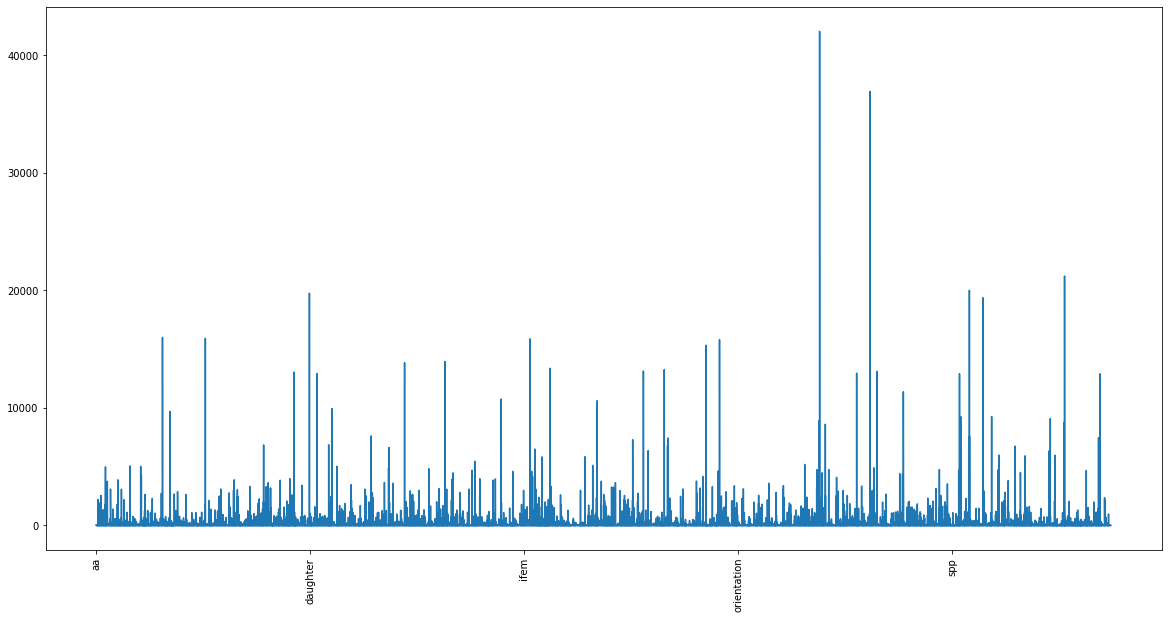

In [28]:
plt.figure(figsize=(20,10))
df_bow_sklearn.sum(axis=0).plot()
plt.xticks(rotation=90)

* As it shows this matrix have still characters we normally don`t want as topics like aa or aaa or aaai there is one solution for that and part of why we start with the bag of words is because there is another algorith that takes as input this matrix and discard this features..this is the TF-IDF (Term Frequenc-Inverse Document Frequency)

## TF_IDF

is principally described as the frequency of a word within a document times the frequency accross all documents:
$$TF-IDF(t,d)=TF(t,d)X IDF(t)$$
for a word $t$ in document $d$.
$$IDF(t)=\log\frac{\textrm{Total Number of documents}}{\textrm{Number documents contains t}}$$
$$TF(t,d)=\frac{\textrm{Number of times t appears in d}}{\textrm{Total number of words in d}}$$

In [23]:
from numpy import linalg#normalization by an l2 norm
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
#calculating the term frequency according to each document
tf_td=BOW/BOW.sum(axis=1)

0        344
1        253
2        213
3        249
4        223
        ... 
11035    188
11036    348
11037    215
11038    214
11039    237
Length: 11040, dtype: int64

In [234]:
#This is the idf with a correction to take so the log function does not go to -inifinity
idf=np.log(((1+BOW.shape[1])/(1+BOW.sum(axis=0))))+1

In [236]:
#this is the dot product of the matrix of the total values
tf_idf=np.dot(tf_td,idf)
#since is this the last step we is compute expensive and the allocations this will be the result of all the t 

In [40]:
#this is the sklearn using the same algorithm put above but less comput expensive so we star working with this
vectorizer = TfidfVectorizer(analyzer='word',stop_words='english',norm='l2')
response = vectorizer.fit_transform(df_abstracts.clean_abstract.to_list())
df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=vectorizer.get_feature_names_out())
df_tfidf_sklearn.head(5)

,aa,aaa,aaai,aaas,aabw,aac,aacse,aacte,aag,aaibs,...,ﬁsheries,ﬁshery,ﬁxate,ﬂavor,ﬂexibility,ﬂora,ﬂow,ﬂuorescence,𝛿c,𝛿n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_tfidf_norm=df_tfidf_sklearn.apply(lambda x:np.log(x+1))

*TSNE is used with manifold package is used for dimension reduction and visualization in this case the TF-IDF matrix*

c:\Users\mauricio.obando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


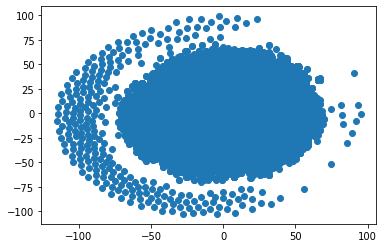

In [61]:
tsne=TSNE(2,perplexity=120, learning_rate=500)
tsne_result=tsne.fit_transform(df_tfidf_norm)
plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
plt.show()

In [66]:
km_2=KMeans(10)
km_2.fit(df_tfidf_norm)

KMeans(n_clusters=10)

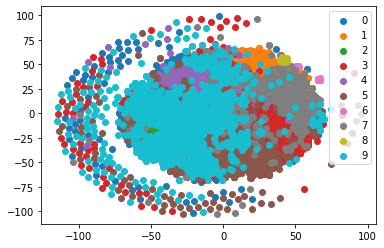

In [67]:
for i in range(km_2.n_clusters):
    plt.scatter(tsne.embedding_[km_2.labels_==i,0],tsne.embedding_[km_2.labels_==i,1],label=str(i))
plt.legend()
plt.show()

In [78]:
for i in range(np.unique(km_2.labels_).shape[0]):
    print('\n cluster:',i)
    print(df_abstracts[df_abstracts.index.isin(df_tfidf_sklearn.assign(cluster=km_2.labels_).query('cluster==@i').sample(min([5,(km_2.labels_==i).sum()])).index)].AbstractNarration)


 cluster: 0
3665     The broader impact of this Small Business Inno...
6429     The internal temperature of the human body can...
6461     The broader impact/commercial potential of thi...
10577    The broader impact/commercial potential of thi...
12465    The broader impact of this Small Business Inno...
Name: AbstractNarration, dtype: object

 cluster: 1
115      This project aims to serve the national intere...
195      The purpose of this project is to further deve...
5881     The broader impact/commercial potential of thi...
7838     The University of Pennsylvania, the University...
11866    This research project will use a large data se...
Name: AbstractNarration, dtype: object

 cluster: 2
5510     Navigating the New Arctic (NNA) is one of NSF'...
8087     All living things on Earth, and the environmen...
8583     This award was made through the "Signals in th...
9537     This award provides support to U.S. researcher...
10098    Data and scholarly products from Arctic resear..

*Some samples of the clusters, the labeling of each cluster has to be manual to assign the most related topic to that cluster. The real problem with the results of this abstract separation is that according to tsne validation the distribution of the data not showing a clear clustering pattern.*

In [79]:
pca_analysis=PCA(15)
pca_analysis.fit(df_tfidf_sklearn)
pca_analysis.explained_variance_

array([0.01098205, 0.00871216, 0.00569903, 0.00562143, 0.00426886,
       0.00400852, 0.00369705, 0.00341697, 0.00333754, 0.00306742,
       0.00293922, 0.00282188, 0.00271056, 0.00252391, 0.00245076])

In [80]:
km_1=KMeans(15)
km_1.fit(pca_analysis.transform(df_tfidf_sklearn))

KMeans(n_clusters=15)

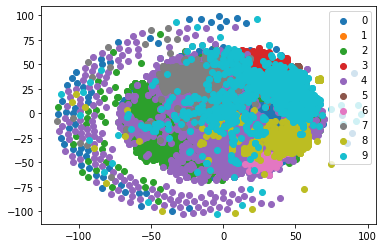

In [75]:
for i in range(km_1.n_clusters):
    plt.scatter(tsne.embedding_[km_1.labels_==i,0],tsne.embedding_[km_1.labels_==i,1],label=str(i))
plt.legend()
plt.show()

There still too many noise on the data to make assumptions within the clusters or the model that you could to recognize the pattern in order to make more accurate labeling. That is why PCA analisys didn`t went so well too, in this case instead of using topoligical manifold reduction the PCA has the same use in this case.